Neste notebook apliquei o algoritmo K-Means para agrupar os filmes da Netflix de acordo com suas características numéricas, sendo o objetivo identificar padrões de similaridade entre os títulos.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [21]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [22]:
filmes = df[df['type'] == 'Movie'].copy()
filmes['duration_min'] = filmes['duration'].str.replace('min', '', case=False).str.strip().astype(float)

filmes['num_genres'] = filmes['listed_in'].str.split(',').apply(len)
dados = filmes[['duration_min', 'release_year', 'num_genres']].dropna()

Nesta célula eu filtrei apenas os filmes, limpei a coluna de duração para deixar somente os minutos, contei quantos gêneros cada filme possui e selecionei apenas as colunas numéricas que seriam usadas no K-Means.

In [23]:
scaler = StandardScaler()
dados_scaled = scaler.fit_transform(dados)

Aqui eu padronizei os dados usando StandardScaler. 

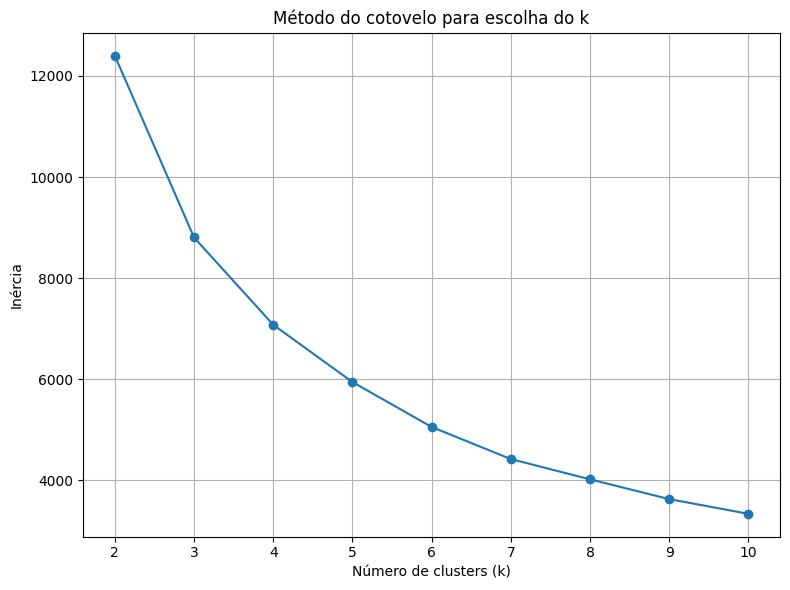

In [24]:
i = []
ks = range(2, 11)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(dados_scaled)
    i.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(ks, i, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do cotovelo para escolha do k')
plt.xticks(ks)
plt.grid(True)
plt.tight_layout()
plt.show()

Nesta parte eu testei vários valores de k e calculei a inércia do K-Means para cada um. Depois plotei o gráfico do cotovelo para identificar o ponto onde a queda da inércia diminui.

O gráfico do cotovelo mostra como a inércia do K-Means diminui conforme aumentamos o número de clusters (k), sendo a queda mais forte acontece entre k=2 e k=4, e depois a melhoria fica menor, dessa maneira usei k = 4.

In [25]:
k=4
kmeans= KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(dados_scaled)


pca =PCA(n_components=2)
pca_result = pca.fit_transform(dados_scaled)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters

Aqui eu rodei o K-Means com k = 4 e depois apliquei PCA para reduzir os dados para duas dimensões, permitindo visualizar os clusters no plano 2D de forma mais clara.

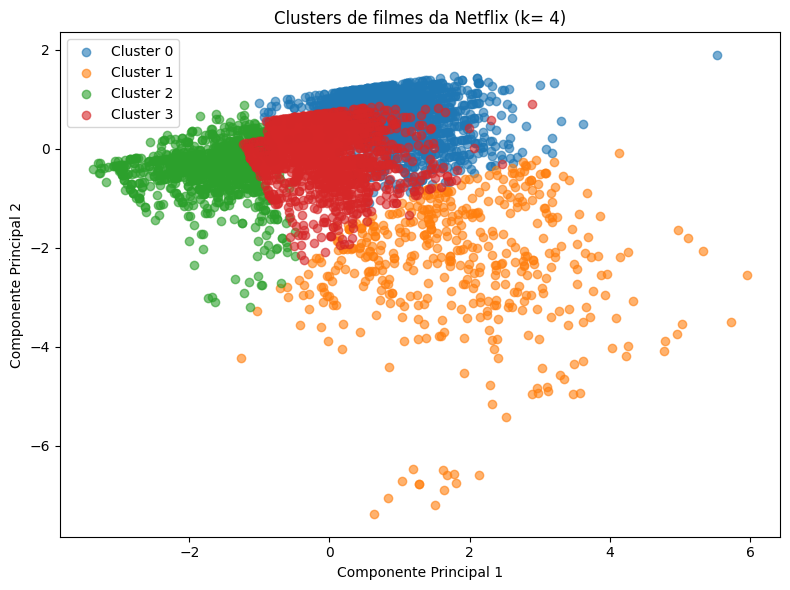

In [26]:
plt.figure(figsize=(8, 6))
for i in range(k): 
    grupo = pca_df[pca_df['cluster'] == i]
    plt.scatter(grupo['PC1'], grupo['PC2'], alpha=0.6, label=f'Cluster {i}')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters de filmes da Netflix (k= 4)')
plt.legend()
plt.tight_layout()
plt.show()

Após escolher k=4, foi aplicado o K-Means e projetado os filmes em duas dimensões usando o PCA, em que cada cor do gráfico representa um cluster diferente, formado por filmes com características semelhantes.

Percebe-se que alguns clusters são mais compactos, indicando filmes bem parecidos, enquanto outros são mais espalhados, mostrando maior variedade interna, assim essa visualização revela grupos naturais de filmes com base em duração, ano e número de gêneros.

Esse agrupamento ajuda a compreender melhor como os filmes se organizam em termos de duração, ano e diversidade de gêneros.